<a href="https://colab.research.google.com/github/Gowtham280103/Cothon_AI-Python/blob/main/Stock_prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
2558/2558 ━━━━━━━━━━━━━━━━━━━━ 76s 28ms/step - loss: 7.6458e-04
Epoch 2/10
2558/2558 ━━━━━━━━━━━━━━━━━━━━ 75s 29ms/step - loss: 3.5196e-04
Epoch 3/10
2558/2558 ━━━━━━━━━━━━━━━━━━━━ 79s 28ms/step - loss: 3.0240e-04
Epoch 4/10
2558/2558 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - loss: 2.6886e-04
Epoch 5/10
2558/2558 ━━━━━━━━━━━━━━━━━━━━ 83s 29ms/step - loss: 3.0101e-04
Epoch 6/10
2558/2558 ━━━━━━━━━━━━━━━━━━━━ 86s 30ms/step - loss: 2.7162e-04
Epoch 7/10
2558/2558 ━━━━━━━━━━━━━━━━━━━━ 78s 29ms/step - loss: 2.0711e-04
Epoch 8/10
2558/2558 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - loss: 2.2323e-04
Epoch 9/10
2558/2558 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - loss: 2.5461e-04
Epoch 10/10
2558/2558 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - loss: 1.7842e-04
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


<ipython-input-1-bc0db3e91776>:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


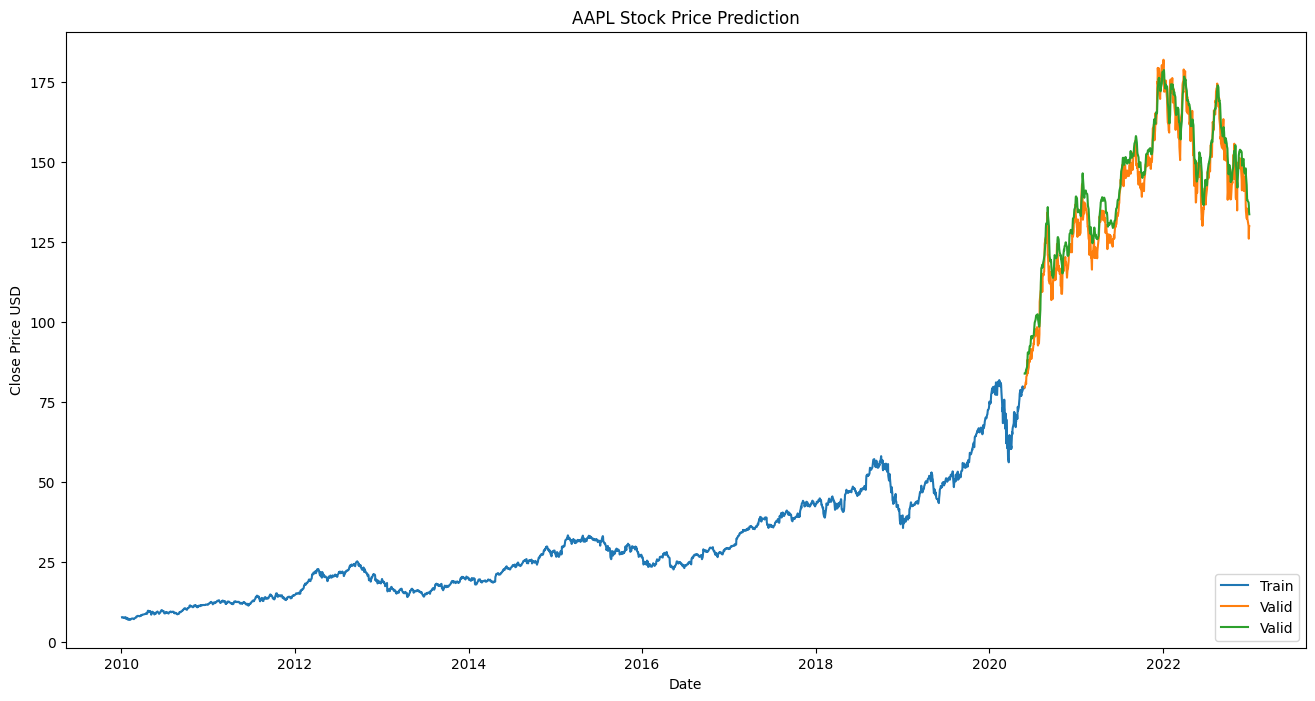

In [1]:
# Step 1: Install required libraries
!pip install numpy pandas matplotlib tensorflow yfinance

# Step 2: Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import yfinance as yf

# Step 3: Load the dataset
# Here we're using Yahoo Finance to fetch stock data (e.g., Apple Inc.)
ticker = 'AAPL'
data = yf.download(ticker, start='2010-01-01', end='2023-01-01')
data = data[['Close']]
data = data.dropna()

# Step 4: Preprocess the data
# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create training and testing datasets
training_data_len = int(np.ceil(len(scaled_data) * .8))
train_data = scaled_data[0:int(training_data_len), :]

# Split data into x_train and y_train
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Step 5: Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Step 6: Train the model
model.fit(x_train, y_train, batch_size=1, epochs=10)

# Step 7: Create testing dataset
test_data = scaled_data[training_data_len - 60:, :]
x_test = []
y_test = data['Close'][training_data_len:].values  # Use actual prices for comparison

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Step 8: Make predictions
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)  # Inverse scaling to original prices

# Step 9: Visualize the results
# Plotting the results
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16, 8))
plt.title(f'{ticker} Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price USD')
plt.plot(train['Close'], label='Train')
plt.plot(valid[['Close', 'Predictions']], label='Valid')
plt.legend(loc='lower right')
plt.show()
